In [1]:
appliances = ['kettle']

techniques = ['logisticRegression', 'KNN', 'SVM', 'SGD', 'randomForest', 'perceptron', 'ANN', 'CNN', 'GRU']



homes = ['test',1,2,5]

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
plt.style.use('ggplot')
rcParams['figure.figsize'] = (20, 8)


Bad key "text.kerning_factor" on line 4 in
/home/tokyo/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
def save_df_into_csv(df, dp_tec, appliance, house, is_test=False):
    if is_test == True:
        nome_arquivo = 'saida_teste_' #TODO

    else:
        nome_arquivo = 'saida_casa_' + str(house) + '_'

    nome_appliance = appliance.replace(' ', '_')
    nome_arquivo = 'results/csv/'+nome_arquivo + dp_tec + '_' + nome_appliance + '.csv'

    df.to_csv(nome_arquivo, sep=',', header=True, index=True)
    return True


def open_csv_as_df(dp_tec, appliance, house, is_test=False):
    if is_test == True:
        nome_arquivo = 'saida_teste_'
    else:
        nome_arquivo = 'saida_casa_' + str(house) + '_'
    nome_appliance = appliance.replace(' ', '_')
    nome_arquivo = 'results/csv/'+nome_arquivo + dp_tec + '_' + nome_appliance + '_v2.csv'
    df = pd.read_csv(nome_arquivo, sep=',')
    return df

In [4]:
thresholds_pr = {'kettle': {'ANN': 0.962123, 'CNN': 0.9442539628177162, 'GRU': 0.9144314582286764},
                 'toaster': {'ANN': 0.4651746613790504, 'CNN': 1.2497629493591376, 'GRU': 0.4214651086949743},
                 'dish washer': {'ANN': 0.5735587517359696, 'CNN': 0.7035587517359696, 'GRU': 0.7553680696795063}}


def apply_threshold(df, threshold):
    df = df.copy()
    df.loc[:, 'ligado'] = df['ligado'].astype(int)
    df.loc[:, 'saidas'] = df['saidas'].astype(int)
    df.loc[:,'saidas'] = df['saidas'].apply(lambda x: 1 if x > threshold else 0)
    return df

In [ ]:
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt

# matplotlib.rc('font', size=MEDIUM_SIZE)
# matplotlib.rc('axes', titlesize=BIGGER_SIZE)

# thresholds_pr = {'kettle': {'ANN': 0.7820435670049241, 'CNN': 0.3689097998042901, 'GRU': 0.07172139446871978},
#                  'toaster': {'ANN': 0.582139556871978, 'CNN': 1.2497629493591376, 'GRU': 0.4214651086949743},
#                  'dish washer': {'ANN': 0.5735587517359696, 'CNN': 0.7035587517359696, 'GRU': 0.7553680696795063}}





for app in appliances:
    for tec in techniques:
        for house in homes:
            if house == 'test':
                df = open_csv_as_df(tec, app, 1, is_test=True)
            else:
                df = open_csv_as_df(tec, app, house)
            if tec in ['ANN', 'CNN', 'GRU']:
                threshold = thresholds_pr[app][tec]
                df = apply_threshold(df, threshold)

            df.loc[:,'saidas'] = df['saidas'].apply(lambda x: 1.02 if x ==1 or x ==True else 0)

            # test = test.set_index('time')
            # df = df[df.index < df.index[int(0.5*len(df))]]
            print(house)
            print(tec)
            plt.figure().set_figwidth(40)
            plt.plot(df.index, df['ligado'], label = 'ligado', color='#2596be')
            plt.plot(df.index, df['saidas'], label = "ligado_predicao", color='#e28743')
            plt.xlabel('timestamp')
            plt.ylabel('Resultado')
            plt.legend()

            # plt.title(label='Resultados', fontdict= {'fontsize': rcParams['axes.titlesize'],
            # 'fontweight' : rcParams['axes.titleweight'],
            # 'verticalalignment': 'baseline',
            # 'horizontalalignment': 'center'})
            # where_to_save = 'results/plot/resultado_'+app+'_'+tec+'_'+str(house)+'.eps'
            # plt.savefig(where_to_save, format='eps')
            plt.show()
                        

/tmp/ipykernel_7343/3272044023.py:24: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(where_to_save, format='eps')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


2 CNN


/home/tokyo/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


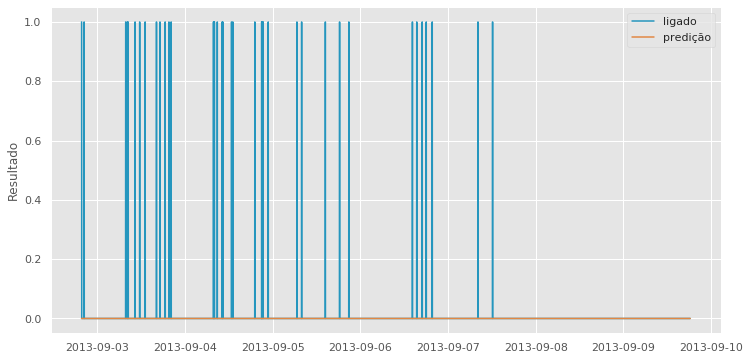

In [38]:
app = 'kettle'
tec = 'CNN' 
house = '2'
df = open_csv_as_df(tec, app, house)
threshold = thresholds_pr[app][tec]
df = apply_threshold(df, threshold)
df.loc[:,'saidas'] = df['saidas'].apply(lambda x: 1.02 if x ==1 or x ==True else 0)

df['time'] = pd.to_datetime(df['time'])
df= df.loc[2000000:2100000]

print(house, tec)
plt.figure(figsize=(12,6))
plt.plot(df['time'], df['ligado'], label = 'ligado', color='#2596be')
plt.plot(df['time'], df['saidas'], label = "predição", color='#e28743')
plt.ylabel('Resultado')
plt.legend()

# plt.title(label='Resultados', fontdict= {'fontsize': rcParams['axes.titlesize'],
# 'fontweight' : rcParams['axes.titleweight'],
# 'verticalalignment': 'baseline',
# 'horizontalalignment': 'center'})
where_to_save = 'results/plot/resultado_'+app+'_'+tec+'_'+str(house)+'periodo_estranho.eps'
plt.savefig(where_to_save, format='eps')
plt.show()

/tmp/ipykernel_7343/3158030865.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(where_to_save, format='eps')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/tokyo/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


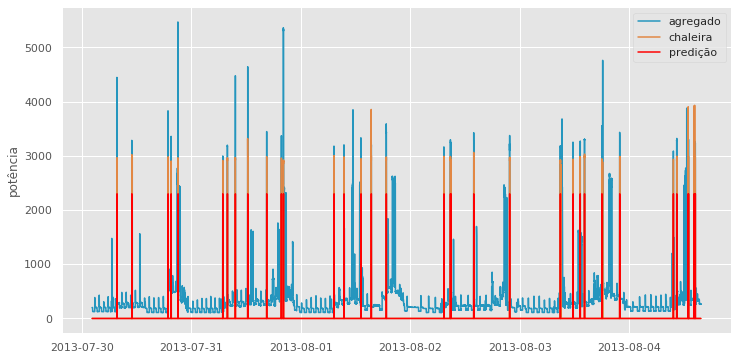

In [39]:
tec = 'GRU'
house = '2'
app = 'kettle'
df = open_csv_as_df(tec, app, house)
threshold = thresholds_pr[app][tec]
df = apply_threshold(df, threshold)
df.loc[:,'saidas'] = df['saidas'].apply(lambda x: 2300 if x ==1 or x ==True else 0)

df['time'] = pd.to_datetime(df['time'])
df= df.loc[1500000:1580000]

plt.figure(figsize=(12,6))
plt.plot(df['time'], df['pwr_act_mains'], label = 'agregado', color='#2596be')
plt.plot(df['time'], df['pwr_act_kettle'], label = "chaleira", color='#e28743')
plt.plot(df['time'], df['saidas'], label = "predição", color='red')
plt.ylabel('potência')
plt.legend()
where_to_save = 'results/plot/resultado_'+app+'_'+tec+'_'+str(house)+'.eps'
plt.savefig(where_to_save, format='eps')
plt.show()

/tmp/ipykernel_7343/1540661277.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(where_to_save, format='eps')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/tokyo/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


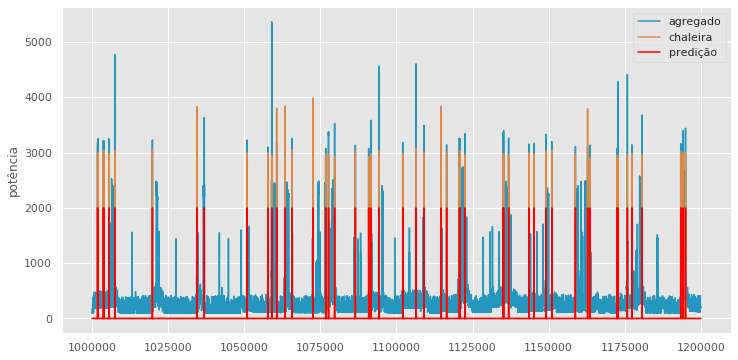

In [40]:
###PEGAR ESSA AQUI!

tec = 'SGD'
house = '2'
app = 'kettle'
df = open_csv_as_df(tec, app, house)
df.loc[:,'saidas'] = df['saidas'].apply(lambda x: 2000 if x ==1 or x ==True else 0)
df= df.loc[1000000:1200000]

plt.figure(figsize=(12,6))
plt.plot(df.index, df['pwr_act_mains'], label = 'agregado', color='#2596be')
plt.plot(df.index, df['pwr_act_kettle'], label = "chaleira", color='#e28743')
plt.plot(df.index, df['saidas'], label = "predição", color='red')
plt.ylabel('potência')
plt.legend()
where_to_save = 'results/plot/resultado_'+app+'_'+tec+'_'+str(house)+'.eps'
plt.savefig(where_to_save, format='eps')
plt.show()

/tmp/ipykernel_7343/1383517282.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(where_to_save, format='eps')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/tokyo/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


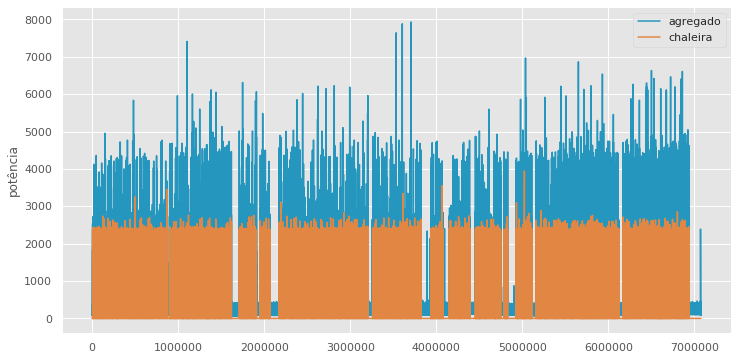

/tmp/ipykernel_7343/1383517282.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(where_to_save, format='eps')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/tokyo/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


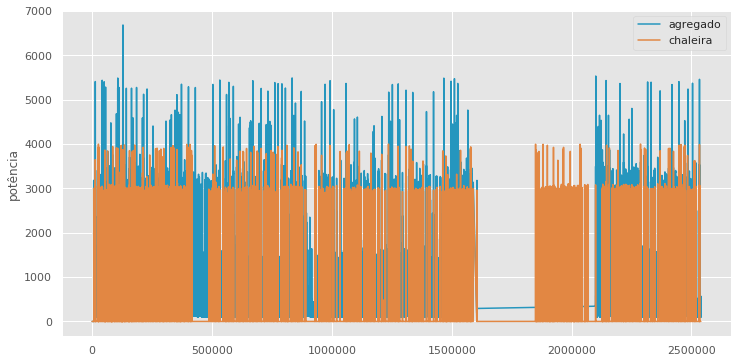

/tmp/ipykernel_7343/1383517282.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(where_to_save, format='eps')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/tokyo/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


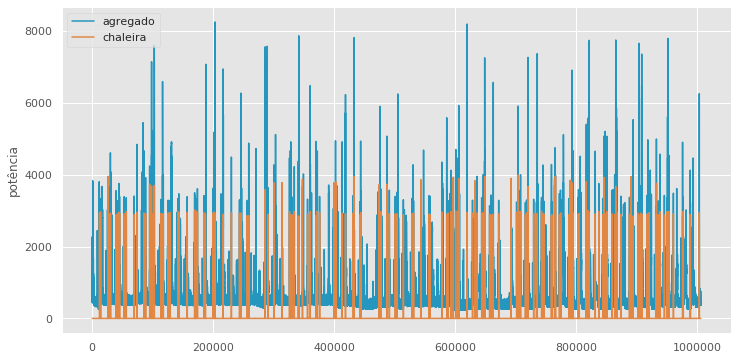

In [41]:
houses = ['1','2','5']
for house in houses:
    app = 'kettle'
    tec = 'CNN' 
    df = open_csv_as_df(tec, app, house)

    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['pwr_act_mains'], label = 'agregado', color='#2596be')
    plt.plot(df.index, df['pwr_act_kettle'], label = "chaleira", color='#e28743')
    plt.ylabel('potência')
    plt.legend()
    where_to_save = 'results/plot/resultado_'+app+'_'+str(house)+'.eps'
    plt.savefig(where_to_save, format='eps')
    plt.show()

/tmp/ipykernel_7343/2423703280.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(where_to_save, format='eps')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/tokyo/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


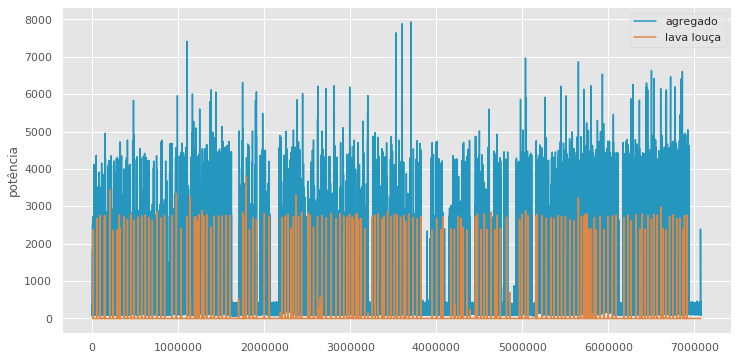

/tmp/ipykernel_7343/2423703280.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(where_to_save, format='eps')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/tokyo/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


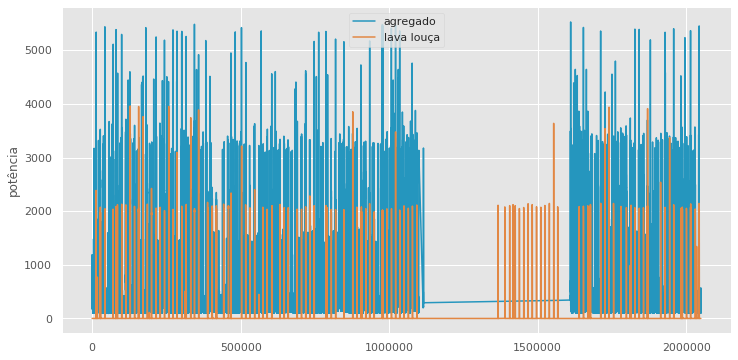

/tmp/ipykernel_7343/2423703280.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(where_to_save, format='eps')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/tokyo/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


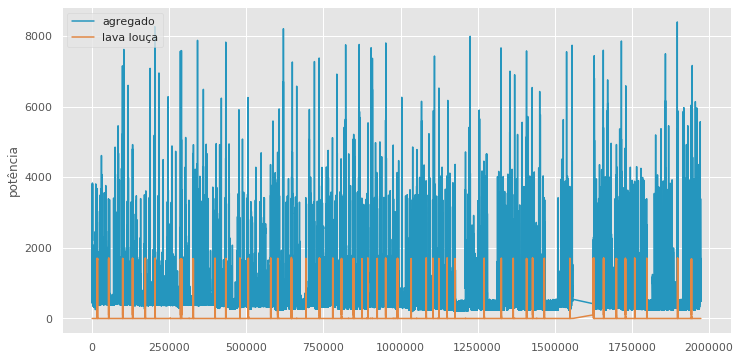

In [37]:
houses = ['1','2','5']
for house in houses:
    app = 'dish washer'
    tec = 'CNN' 
    df = open_csv_as_df(tec, app, house)

    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['pwr_act_mains'], label = 'agregado', color='#2596be')
    plt.plot(df.index, df['pwr_act_'+app], label = "lava louça", color='#e28743')
    plt.ylabel('potência')
    plt.legend()
    where_to_save = 'results/plot/resultado_'+app+'_'+str(house)+'.eps'
    plt.savefig(where_to_save, format='eps')
    plt.show()

/tmp/ipykernel_7343/1561569323.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(where_to_save, format='eps')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/tokyo/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


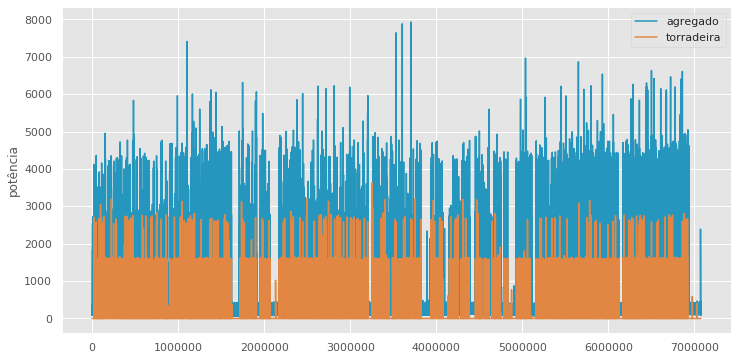

/tmp/ipykernel_7343/1561569323.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(where_to_save, format='eps')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/tokyo/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


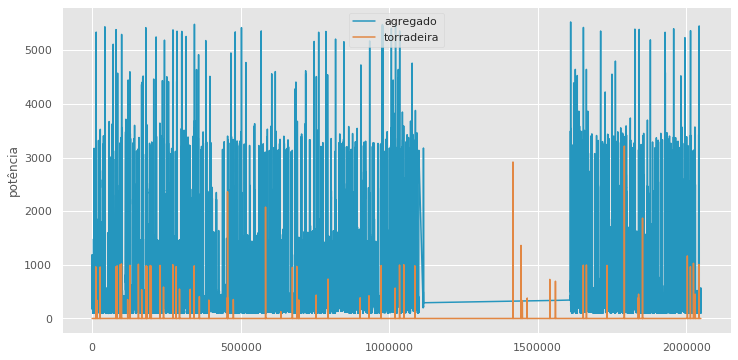

/tmp/ipykernel_7343/1561569323.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(where_to_save, format='eps')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/tokyo/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


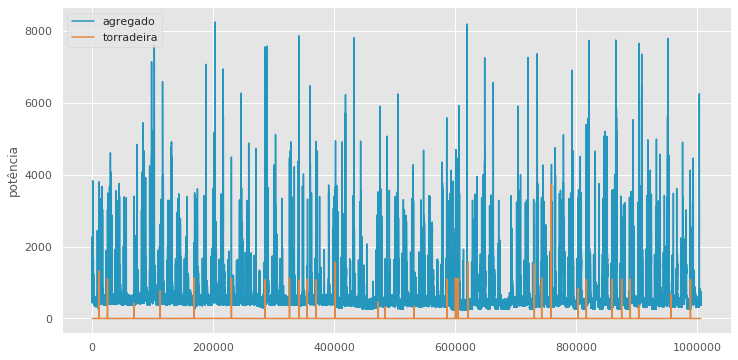

In [42]:
houses = ['1','2','5']
for house in houses:
    app = 'toaster'
    tec = 'CNN' 
    df = open_csv_as_df(tec, app, house)

    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['pwr_act_mains'], label = 'agregado', color='#2596be')
    plt.plot(df.index, df['pwr_act_'+app], label = "torradeira", color='#e28743')
    plt.ylabel('potência')
    plt.legend()
    where_to_save = 'results/plot/resultado_'+app+'_'+str(house)+'.eps'
    plt.savefig(where_to_save, format='eps')
    plt.show()

/tmp/ipykernel_6791/4214575302.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(where_to_save, format='eps')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/tokyo/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


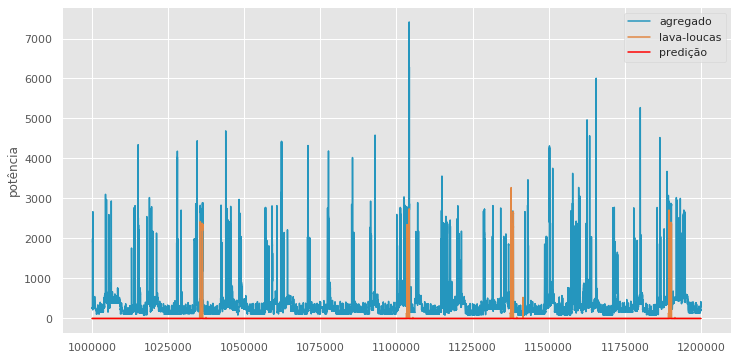

In [6]:
tec = 'GRU'
house = '1'
app = 'dish washer'
df = open_csv_as_df(tec, app, house)
df.loc[:,'saidas'] = df['saidas'].apply(lambda x: 2000 if x ==1 or x ==True else 0)
df= df.loc[1000000:1200000]

plt.figure(figsize=(12,6))
plt.plot(df.index, df['pwr_act_mains'], label = 'agregado', color='#2596be')
plt.plot(df.index, df['pwr_act_dish washer'], label = "lava-loucas", color='#e28743')
plt.plot(df.index, df['saidas'], label = "predição", color='red')
plt.ylabel('potência')
plt.legend()
where_to_save = 'results/plot/resultado_'+app+'_'+tec+'_'+str(house)+'.eps'
plt.savefig(where_to_save, format='eps')
plt.show()